# Atelier 3: ANOVA

# 

# Réalisation 

## TRAORE Koudadim Olivier (IFA 2)

## AIT EL HAJ Safaa (GMP 2)

# 

# PREMIERE PARTIE

# 

# ANOVA à un facteur

## Affichage des données

In [20]:
import pandas as pd
# Création du dataframe par read_csv
df = pd.read_csv("C:/Users/asus/Desktop/Python/ble.csv", sep=";")
print(df.head(30))
df

    parcelle variete phyto   rdt
0          1      V1  Avec  5652
1          2      V1  Avec  5583
2          3      V1  Avec  5612
3          4      V1  Avec  5735
4          5      V1  Avec  5704
5          6      V1  Avec  5544
6          7      V1  Avec  5563
7          8      V1  Avec  5610
8          9      V1  Avec  5641
9         10      V1  Avec  5637
10        11      V1  Sans  5581
11        12      V1  Sans  5808
12        13      V1  Sans  5582
13        14      V1  Sans  5528
14        15      V1  Sans  5754
15        16      V1  Sans  5676
16        17      V1  Sans  5558
17        18      V1  Sans  5724
18        19      V1  Sans  5619
19        20      V1  Sans  5565
20        21      V2  Avec  5458
21        22      V2  Avec  5591
22        23      V2  Avec  5501
23        24      V2  Avec  5714
24        25      V2  Avec  5708
25        26      V2  Avec  5731
26        27      V2  Avec  5691
27        28      V2  Avec  5571
28        29      V2  Avec  5613
29        

pandas.core.frame.DataFrame

## Variable reponse:

###  Le rendement rdt du blé

## Facteurs:  

### Le traitement phytosanitaire, phyto, avec deux modalités: avec et sans;

### La variété de blé, variete, ayant quatre modalités: V1, V2, V3, V4

## Boxplot avec phyto pour facteur

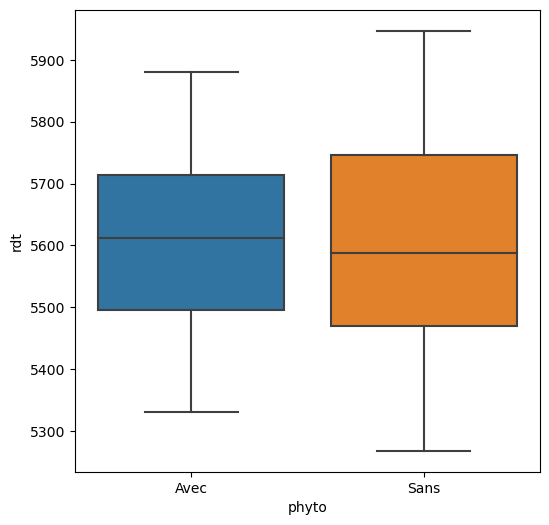

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(6,6))

bp=sns.boxplot(data=df, x='phyto', y='rdt')
plt.show()


## Boxplot avec variete pour facteur

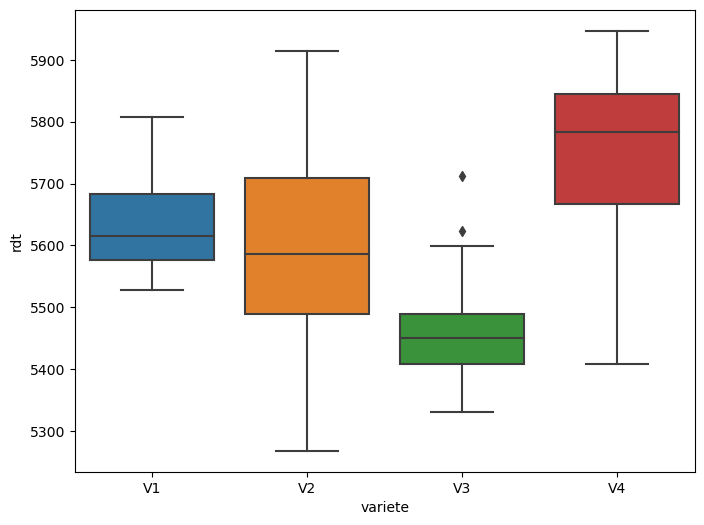

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(8,6))

bp=sns.boxplot(data=df, x='variete', y='rdt')
plt.show()

## ANOVA avec phyto pour facteur

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Génération du modèle 
model = ols('rdt ~ C(phyto)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(phyto),1.0,1008.20,1008.200000,0.041341,0.839411
Residual,78.0,1902223.35,24387.478846,NaN,NaN


### Au seuil 5%, on peut affirmer que la variable à expliquer c-à-d le rendement ne varie pas avec le facteur Traitement phytosanitaire. Car la proba 0.839411>0.05.

## ANOVA avec variete pour facteur

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Génération du modèle 
model = ols('rdt ~ C(variete)', data=df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(variete),3.0,851844.55,283948.183333,20.525327,7.674413e-10
Residual,76.0,1051387.00,13834.039474,NaN,NaN


### Au seuil 5%, on peut affirmer que la variable à expliquer c-à-d le rendement varie selon le facteur Variete de blé. Car la proba 7.674413e-10<0.05.

# 

# DEUXIEME PARTIE

# 

# ANOVA à 2 facteurs

## Création de données

In [15]:
import numpy as np
import pandas as pd

#création des données
#Sj, j=1,...,5: Sécretaire professionnel j
#Mi, i=1,...,4: Modèle de la machine i
d={
    'Machine_Model': np.repeat(['M1','M2','M3','M4'],10),
    'Secretaire':np.tile(np.repeat(['S1', 'S2', 'S3','S4',"S5"], 2), 4),
    'Mean_Word_Min': [33,36,31,31,34,36,34,33,31,31,
                      32,35,37,35,39,36,33,36,35,36,
                      37,39,35,35,34,37,31,35,37,39,
                      29,31,31,33,33,34,31,27,33,33]
}

Df=pd.DataFrame(d)
Df

,Machine_Model,Secretaire,Mean_Word_Min
0,M1,S1,33
1,M1,S1,36
2,M1,S2,31
3,M1,S2,31
4,M1,S3,34
5,M1,S3,36
6,M1,S4,34
7,M1,S4,33
8,M1,S5,31
9,M1,S5,31


## Tailles des groupes, nombre de répétitions et nombre total d’observations

### I=4; J=5; K=2; N=40

## Boites à moustache pour chaque groupe

### Boites à moustache pour (Machine_Model, Mean_Word_Min)

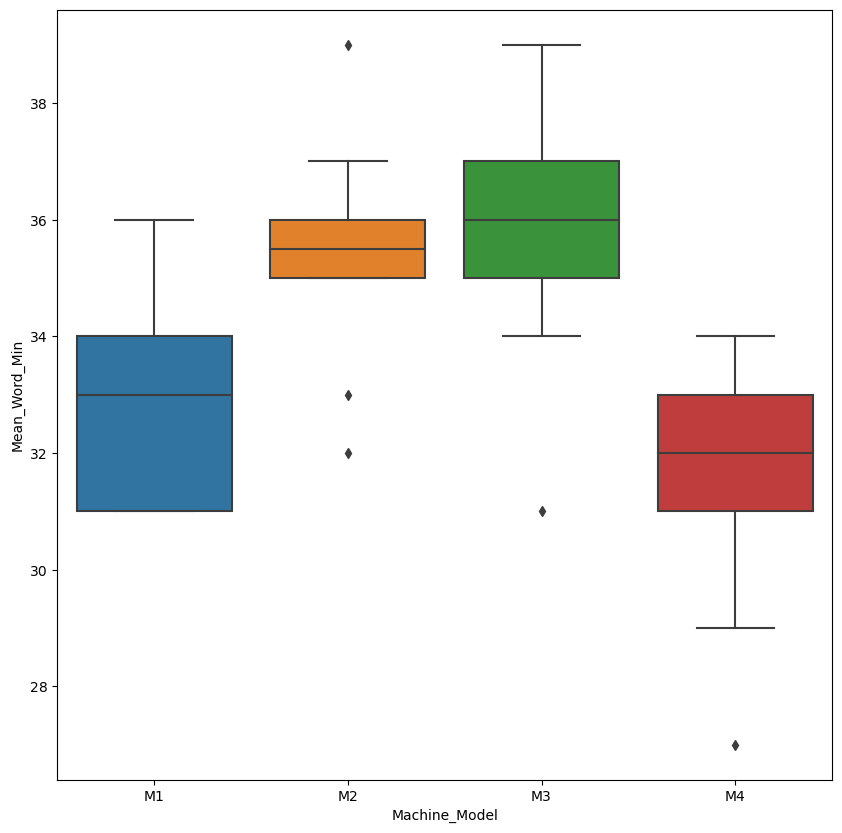

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10,10))


bp=sns.boxplot(data=Df, x='Machine_Model', y='Mean_Word_Min')
plt.show()

### Boites à moustache pour (Secretaire, Mean_Word_Min)

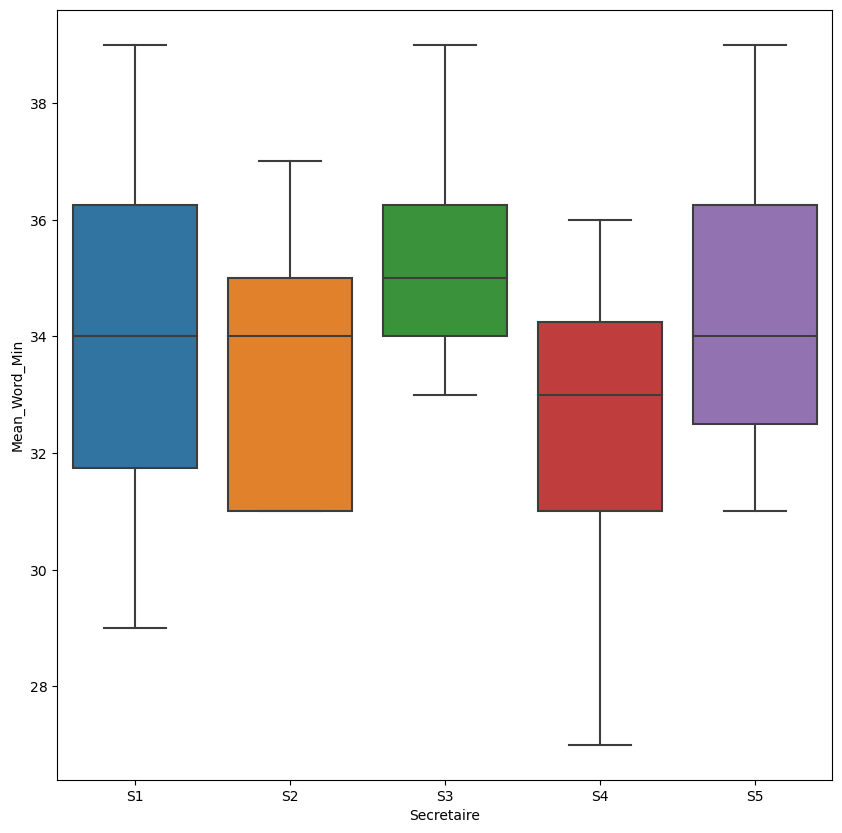

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10,10))


bp=sns.boxplot(data=Df, x='Secretaire', y='Mean_Word_Min')
plt.show()

## Quel est l’effet de modèles de machines à écrire, secrétaires professionnelles et les interactions machine-secrétaire ?

### L'effet du modèle de la machine à écrire sur le nombre moyen de mots tapés par minute

In [37]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#Génération du modèle 
model = ols('Mean_Word_Min ~ C(Machine_Model)', data=Df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Machine_Model),3.0,128.1,42.700000,9.271411,0.000112
Residual,36.0,165.8,4.605556,NaN,NaN


#### Pour un seuil de 5%, puisque 0.000112<0.05, on conclura que le modèle de machine à écrire a une influence sur le nombre moyen de mots écrits par minute.

### L'effet du modèle de la nature de la secrétaire sur le nombre moyen de mots tapés par minute

In [34]:
#Génération du modèle 
model = ols('Mean_Word_Min ~ C(Secretaire)', data=Df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Secretaire),36.15,4.0,1.227207,0.31706
Residual,257.75,35.0,NaN,NaN


#### Pour un seuil de 5%, puisque 0.311706>0.05, on conclura que quelque soit la secrétaire professionnelle, celle-ci n'a aucune influence sur le nombre moyen de mots écrits par minute.

### L'effet du modèle de l'intéraction machine-secrétaire sur le nombre moyen de mots tapés par minute

In [35]:
#Génération du modèle 
model = ols('Mean_Word_Min ~ C(Machine_Model):C(Secretaire)', data=Df).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Machine_Model):C(Secretaire),19.0,241.9,12.731579,4.896761,0.000438
Residual,20.0,52.0,2.600000,NaN,NaN


#### Pour un seuil de 5%, puisque 0.000438<0.05, on conclura que l'intéraction machine-sécretaire influence le nombre moyen de mots écrits par minute.

## ANOVA sur ces deux facteurs et leurs interactions

In [36]:
#Génération du modèle 
model = ols('Mean_Word_Min ~ C(Machine_Model) + C(Secretaire) + C(Machine_Model):C(Secretaire)', data=Df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Machine_Model),128.10,3.0,16.423077,0.000013
C(Secretaire),36.15,4.0,3.475962,0.026029
C(Machine_Model):C(Secretaire),77.65,12.0,2.488782,0.034499
Residual,52.00,20.0,NaN,NaN


### La probabilité 0.034499<0.05 (seuil); donc les interactions sont significatives. Il convient de les conserver. De plus d'après les tests séparés des effets des deux facteurs et leur intéraction par ANOVA, il ressort que le facteur Secrétaire est sans effet mais son intéraction avec une machine à écrire en a un... Les résultas d'une ANOVA sur les facteurs Machine et Interaction Machine-Secrétaire offriront une meilleure explication à la variable Nombre Moyen de mots.

## ANOVA sur les facteurs Machine et Interaction Machine-Secrétaire

In [38]:
#Génération du modèle 
model = ols('Mean_Word_Min ~ C(Machine_Model) + C(Machine_Model):C(Secretaire)', data=Df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Machine_Model),128.1,3.0,16.423077,0.000013
C(Machine_Model):C(Secretaire),113.8,16.0,2.735577,0.017614
Residual,52.0,20.0,NaN,NaN
